# Activation functions

In [4]:
!pip install nnfs
import numpy as np
from matplotlib import pyplot as plt
from math import sin
from nnfs.datasets import spiral_data
import nnfs # This package is imported so the results are consistent with the book
nnfs.init()

In [5]:
def show_function(func, mi=-10, ma=10, diag='scatter', step=0.01):
    X = [i for i in np.arange(mi, ma, step)]
    Y = [func(x) for x in X]
    fig, ax = plt.subplots()
    getattr(ax, diag)(X, Y)
    ax.set_aspect('auto', anchor='C')
    ax.grid(True, which='both')

## Step function

This function is the simplest function, but it is used rarely if at all nowadays

In [6]:
def step_function(x):
    return 1 if x > 0 else 0

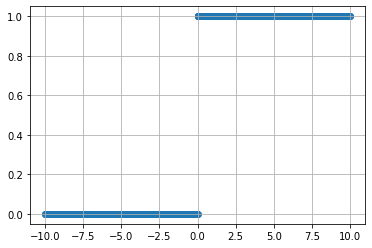

In [7]:
show_function(step_function)

## Linear activation function

The output value equals the input value

In [8]:
def linear_function(x):
    return x

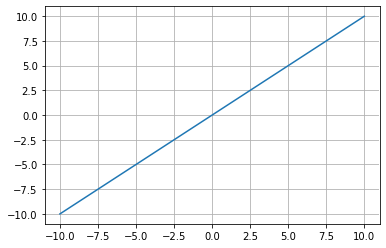

In [9]:
show_function(linear_function, diag='plot')

## Sigmoid activation function

This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0,
and to 1 for positive infinity.

In [10]:
def sigmoid(x):
    return 1/(1 + np.e ** (-x))

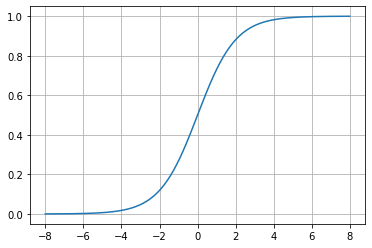

In [11]:
show_function(sigmoid, diag='plot', mi=-8, ma=8)

## Rectivied Linear Unit (ReLU) activation function

The most widely used function - mainly for speed and efficiency

In [12]:
def relu(x):
    return max(0, x)

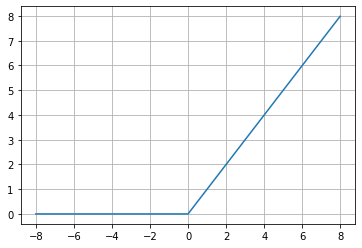

In [13]:
show_function(relu, diag='plot', mi=-8, ma=8)

## Example ReLU and Softmax application

In [14]:
import numpy as np

class Dense(object):
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    @staticmethod
    def softmax(inputs):
        """Computes probabilities given the VALUES"""
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
        keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
        keepdims=True)
        return probabilities
    
    
    def __init__(self, inputs: int, neurons: int, activation):
        # Initialize weights randomly
        # Each COLUMN in the resulting matrix is a neuron's weights
        # It is done to avoid transposing the weights matrix every time we make a forward pass
        # np.random.randn produces a Gaussian distribution with mean of 0 and variance of 1
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        # Biases default to zero
        self.biases = np.zeros((1, neurons))
        # Set activation function
        if isinstance(activation, str):
            if hasattr(self, activation):
                self.activation = getattr(self, activation)
            else:
                raise ValueError(f'Invalid function "{activation}": no such function is defined! You might want to pass in the function object instead')
        elif callable(activation):
            self.activation = activation
        else:
            raise ValueError(f'"Activation" parameter must be either a string specifying activation function name or a callable')
    
    def forward(self, inputs):
        self.output = self.activation(np.dot(inputs, self.weights) + self.biases)
        return self.output
        

Softmax function normalizes the values:

In [15]:
Dense.softmax([[1,2,3]])

array([[0.09003057, 0.24472847, 0.66524096]])

In [17]:
X, Y = spiral_data(samples=100, classes=3)

dense1 = Dense(2, 3, activation='relu')
output1 = dense1.forward(X)

dense2 = Dense(3, 3, activation='softmax')
output2 = dense2.forward(output1)

print(output2[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
